#Классификация

##Библиотечный бейзлайн логистической регрессии

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_recall_curve, auc

df = pd.read_csv('placementdata.csv')

label_encoders = {}
binary_columns = ['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']

for col in binary_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

original_features = ['SSC_Marks', 'HSC_Marks', 'CGPA', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'Internships', 'SoftSkillsRating']

X_baseline = df[original_features].copy()
y = df['PlacementStatus'].copy()

X_baseline_train, X_baseline_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42, stratify=y)

lr_baseline = LogisticRegression(random_state=42, max_iter=1000)
lr_baseline.fit(X_baseline_train, y_train)

y_pred_baseline = lr_baseline.predict(X_baseline_test)
y_proba_baseline = lr_baseline.predict_proba(X_baseline_test)[:, 1]

f1_baseline = f1_score(y_test, y_pred_baseline)
precision_baseline, recall_baseline, _ = precision_recall_curve(y_test, y_proba_baseline)
pr_auc_baseline = auc(recall_baseline, precision_baseline)

print(f"F1-мера: {f1_baseline:.4f}")
print(f"PR AUC: {pr_auc_baseline:.4f}")

F1-мера: 0.7602
PR AUC: 0.8365


##Улучшение бейзлайна

Попробуем убрать признаки, которые обладают слабой корреляцией с целевой переменной

In [10]:
new_features = ['SSC_Marks', 'HSC_Marks', 'CGPA', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating']

X_baseline = df[new_features].copy()

X_baseline_train, X_baseline_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42, stratify=y)

lr_baseline = LogisticRegression(random_state=42, max_iter=1000)
lr_baseline.fit(X_baseline_train, y_train)

y_pred_baseline = lr_baseline.predict(X_baseline_test)
y_proba_baseline = lr_baseline.predict_proba(X_baseline_test)[:, 1]

f1_baseline = f1_score(y_test, y_pred_baseline)
precision_baseline, recall_baseline, _ = precision_recall_curve(y_test, y_proba_baseline)
pr_auc_baseline = auc(recall_baseline, precision_baseline)

print(f"F1-мера: {f1_baseline:.4f}")
print(f"PR AUC: {pr_auc_baseline:.4f}")

F1-мера: 0.7602
PR AUC: 0.8365


Удаление признака Internships не дало эффекта

In [11]:
new_features = ['SSC_Marks', 'HSC_Marks', 'CGPA', 'Projects', 'AptitudeTestScore', 'SoftSkillsRating', 'Internships']

X_baseline = df[new_features].copy()

X_baseline_train, X_baseline_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42, stratify=y)

lr_baseline = LogisticRegression(random_state=42, max_iter=1000)
lr_baseline.fit(X_baseline_train, y_train)

y_pred_baseline = lr_baseline.predict(X_baseline_test)
y_proba_baseline = lr_baseline.predict_proba(X_baseline_test)[:, 1]

f1_baseline = f1_score(y_test, y_pred_baseline)
precision_baseline, recall_baseline, _ = precision_recall_curve(y_test, y_proba_baseline)
pr_auc_baseline = auc(recall_baseline, precision_baseline)

print(f"F1-мера: {f1_baseline:.4f}")
print(f"PR AUC: {pr_auc_baseline:.4f}")

F1-мера: 0.7571
PR AUC: 0.8347


Удаление признака Workshops/Certifications слабо ухудшило метрики

Попробуем создать новые признаки

In [12]:
X_new = df.copy()

X_new['Activity_Skill_Index'] = (X_new['Projects'] + X_new['Internships'] + X_new['Workshops/Certifications']) * X_new['SoftSkillsRating']

enhanced_features = [
    'SSC_Marks', 'HSC_Marks', 'CGPA', 'AptitudeTestScore', 'SoftSkillsRating',
    'Activity_Skill_Index'
]

X_enhanced = X_new[enhanced_features].copy()

X_enhanced_train, X_enhanced_test, y_train, y_test = train_test_split(X_enhanced, y, test_size=0.2, random_state=42, stratify=y)

lr_enhanced = LogisticRegression(random_state=42, max_iter=1000)
lr_enhanced.fit(X_enhanced_train, y_train)

y_pred_enhanced = lr_enhanced.predict(X_enhanced_test)
y_proba_enhanced = lr_enhanced.predict_proba(X_enhanced_test)[:, 1]

f1_enhanced = f1_score(y_test, y_pred_enhanced)
precision_enhanced, recall_enhanced, _ = precision_recall_curve(y_test, y_proba_enhanced)
pr_auc_enhanced = auc(recall_enhanced, precision_enhanced)

print(f"F1-мера: {f1_enhanced:.4f}")
print(f"PR AUC: {pr_auc_enhanced:.4f}")

F1-мера: 0.7590
PR AUC: 0.8322


Использование одного нового признака вместо Projects, Internships, Workshops/Certifications слабо ухудшило метрики

In [13]:
X_new = df.copy()

X_new['Total_Activities'] = X_new['Projects'] + X_new['Internships'] + X_new['Workshops/Certifications']

enhanced_features = [
    'SSC_Marks', 'HSC_Marks', 'CGPA', 'AptitudeTestScore', 'SoftSkillsRating',
    'Total_Activities'
]

X_enhanced = X_new[enhanced_features].copy()

X_enhanced_train, X_enhanced_test, y_train, y_test = train_test_split(X_enhanced, y, test_size=0.2, random_state=42, stratify=y)

lr_enhanced = LogisticRegression(random_state=42, max_iter=1000)
lr_enhanced.fit(X_enhanced_train, y_train)

y_pred_enhanced = lr_enhanced.predict(X_enhanced_test)
y_proba_enhanced = lr_enhanced.predict_proba(X_enhanced_test)[:, 1]

f1_enhanced = f1_score(y_test, y_pred_enhanced)
precision_enhanced, recall_enhanced, _ = precision_recall_curve(y_test, y_proba_enhanced)
pr_auc_enhanced = auc(recall_enhanced, precision_enhanced)

print(f"F1-мера: {f1_enhanced:.4f}")
print(f"PR AUC: {pr_auc_enhanced:.4f}")

F1-мера: 0.7620
PR AUC: 0.8319


Использование нового признака Total_Activities вместо Projects, Internships, Workshops/Certifications практически не повлияло

In [14]:
X_new = df.copy()

X_new['Projects_And_Internships'] = X_new['Projects'] + X_new['Internships']

enhanced_features = [
    'SSC_Marks', 'HSC_Marks', 'CGPA', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
    'Projects_And_Internships'
]

X_enhanced = X_new[enhanced_features].copy()

X_enhanced_train, X_enhanced_test, y_train, y_test = train_test_split(X_enhanced, y, test_size=0.2, random_state=42, stratify=y)

lr_enhanced = LogisticRegression(random_state=42, max_iter=1000)
lr_enhanced.fit(X_enhanced_train, y_train)

y_pred_enhanced = lr_enhanced.predict(X_enhanced_test)
y_proba_enhanced = lr_enhanced.predict_proba(X_enhanced_test)[:, 1]

f1_enhanced = f1_score(y_test, y_pred_enhanced)
precision_enhanced, recall_enhanced, _ = precision_recall_curve(y_test, y_proba_enhanced)
pr_auc_enhanced = auc(recall_enhanced, precision_enhanced)

print(f"F1-мера: {f1_enhanced:.4f}")
print(f"PR AUC: {pr_auc_enhanced:.4f}")

F1-мера: 0.7601
PR AUC: 0.8315


In [15]:
X_new = df.copy()

X_new['Average_Marks'] = (X_new['SSC_Marks'] + X_new['HSC_Marks'] + X_new['CGPA']) / 3

final_features = [
    'Average_Marks',
    'Projects',
    'Workshops/Certifications',
    'AptitudeTestScore',
    'Internships',
    'SoftSkillsRating'
]

X_enhanced = X_new[final_features].copy()

X_enhanced_train, X_enhanced_test, y_train, y_test = train_test_split(X_enhanced, y, test_size=0.2, random_state=42, stratify=y)

lr_enhanced = LogisticRegression(random_state=42, max_iter=1000)
lr_enhanced.fit(X_enhanced_train, y_train)

y_pred_enhanced = lr_enhanced.predict(X_enhanced_test)
y_proba_enhanced = lr_enhanced.predict_proba(X_enhanced_test)[:, 1]

f1_enhanced = f1_score(y_test, y_pred_enhanced)
precision_enhanced, recall_enhanced, _ = precision_recall_curve(y_test, y_proba_enhanced)
pr_auc_enhanced = auc(recall_enhanced, precision_enhanced)

print(f"F1-мера: {f1_enhanced:.4f}")
print(f"PR AUC: {pr_auc_enhanced:.4f}")

F1-мера: 0.7580
PR AUC: 0.8335


Добавление признака Average_Marks вместо признаков SSC_Marks, HSC_Marks и CGPA слабо ухудшило метрики

In [16]:
from sklearn.preprocessing import StandardScaler

original_features = ['SSC_Marks', 'HSC_Marks', 'CGPA', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'Internships', 'SoftSkillsRating']
X_original = df[original_features].copy()

X_scaled = X_original.copy()

X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_scaled_train_processed = scaler.fit_transform(X_scaled_train)
X_scaled_test_processed = scaler.transform(X_scaled_test)

lr_scaled = LogisticRegression(random_state=42, max_iter=1000)
lr_scaled.fit(X_scaled_train_processed, y_train)

y_pred_scaled = lr_scaled.predict(X_scaled_test_processed)
y_proba_scaled = lr_scaled.predict_proba(X_scaled_test_processed)[:, 1]

f1_scaled = f1_score(y_test, y_pred_scaled)
precision_scaled, recall_scaled, _ = precision_recall_curve(y_test, y_proba_scaled)
pr_auc_scaled = auc(recall_scaled, precision_scaled)

print(f"F1-мера: {f1_scaled:.4f}")
print(f"PR AUC: {pr_auc_scaled:.4f}")

F1-мера: 0.7610
PR AUC: 0.8365


Масштабирование признаков не изменило метрики

In [17]:
from sklearn.linear_model import LogisticRegressionCV
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_scaled_train_processed = scaler.fit_transform(X_scaled_train)
X_scaled_test_processed = scaler.transform(X_scaled_test)

param_grid = {
    'C': [0.1, 1.0, 5.0, 10.0, 15.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

lr_cv_l2 = LogisticRegressionCV(Cs=param_grid['C'], penalty='l2', solver='liblinear', cv=5, random_state=42, max_iter=1000)
lr_cv_l2.fit(X_scaled_train_processed, y_train)

lr_cv_l1 = LogisticRegressionCV(Cs=param_grid['C'], penalty='l1', solver='liblinear', cv=5, random_state=42, max_iter=1000)
lr_cv_l1.fit(X_scaled_train_processed, y_train)

best_score_l2 = lr_cv_l2.scores_[1].mean(axis=1).max()
best_score_l1 = lr_cv_l1.scores_[1].mean(axis=1).max()

if best_score_l2 >= best_score_l1:
    best_model = lr_cv_l2
    best_penalty = 'l2'
    best_C = lr_cv_l2.C_[0]
else:
    best_model = lr_cv_l1
    best_penalty = 'l1'
    best_C = lr_cv_l1.C_[0]

y_pred_best = best_model.predict(X_scaled_test_processed)
y_proba_best = best_model.predict_proba(X_scaled_test_processed)[:, 1]

f1_best = f1_score(y_test, y_pred_best)
precision_best, recall_best, _ = precision_recall_curve(y_test, y_proba_best)
pr_auc_best = auc(recall_best, precision_best)

print(f"F1-мера: {f1_best:.4f}")
print(f"PR AUC: {pr_auc_best:.4f}")

F1-мера: 0.7610
PR AUC: 0.8365


Регуляризация и подбор параметров не повлияли на метрики

In [18]:
specific_features = [
    'SSC_Marks', 'HSC_Marks', 'CGPA', 'Projects', 'Workshops/Certifications',
    'AptitudeTestScore', 'Internships', 'SoftSkillsRating',
    'ExtracurricularActivities', 'PlacementTraining'
]

X_specific = df[specific_features].copy()
y = df['PlacementStatus'].copy()

X_scaled = X_specific.copy()

X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_scaled_train_processed = scaler.fit_transform(X_scaled_train)
X_scaled_test_processed = scaler.transform(X_scaled_test)

param_grid = {
    'C': [0.1, 1.0, 5.0, 10.0, 15.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

lr_cv_l2 = LogisticRegressionCV(Cs=param_grid['C'], penalty='l2', solver='liblinear', cv=5, random_state=42, max_iter=1000)
lr_cv_l2.fit(X_scaled_train_processed, y_train)

lr_cv_l1 = LogisticRegressionCV(Cs=param_grid['C'], penalty='l1', solver='liblinear', cv=5, random_state=42, max_iter=1000)
lr_cv_l1.fit(X_scaled_train_processed, y_train)

best_score_l2 = lr_cv_l2.scores_[1].mean(axis=1).max()
best_score_l1 = lr_cv_l1.scores_[1].mean(axis=1).max()

if best_score_l2 >= best_score_l1:
    best_model = lr_cv_l2
    best_penalty = 'l2'
    best_C = lr_cv_l2.C_[0]
else:
    best_model = lr_cv_l1
    best_penalty = 'l1'
    best_C = lr_cv_l1.C_[0]

y_pred_best = best_model.predict(X_scaled_test_processed)
y_proba_best = best_model.predict_proba(X_scaled_test_processed)[:, 1]

f1_best = f1_score(y_test, y_pred_best)
precision_best, recall_best, _ = precision_recall_curve(y_test, y_proba_best)
pr_auc_best = auc(recall_best, precision_best)

print(f"F1-мера: {f1_best:.4f}")
print(f"PR AUC: {pr_auc_best:.4f}")

F1-мера: 0.7727
PR AUC: 0.8521


Другой порядок признаков получился более эффективным улучшением, чем добавление новых признаков и масштабирование

##Имплементация алгоритма

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_recall_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iterations):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(linear_pred)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_pred)
        y_predicted_cls = [0 if i <= 0.5 else 1 for i in y_predicted]
        return np.array(y_predicted_cls)

    def predict_proba(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        probabilities = self._sigmoid(linear_pred)
        return np.column_stack([1 - probabilities, probabilities])

df_processed = df.copy()

binary_columns = ['ExtracurricularActivities', 'PlacementTraining']
for col in binary_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])

target_encoder = LabelEncoder()
df_processed['PlacementStatus'] = target_encoder.fit_transform(df_processed['PlacementStatus'])

X = df_processed.drop(columns=['StudentID', 'PlacementStatus'])
y = df_processed['PlacementStatus'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

custom_lr_baseline = LogisticRegressionFromScratch(learning_rate=0.01, n_iterations=1000)
custom_lr_baseline.fit(X_train, y_train)

y_pred_custom_baseline = custom_lr_baseline.predict(X_test)
y_proba_custom_baseline = custom_lr_baseline.predict_proba(X_test)[:, 1]

accuracy_custom_baseline = accuracy_score(y_test, y_pred_custom_baseline)
f1_custom_baseline = f1_score(y_test, y_pred_custom_baseline)
precision_custom, recall_custom, _ = precision_recall_curve(y_test, y_proba_custom_baseline)
pr_auc_custom_baseline = auc(recall_custom, precision_custom)

print(f"F1-мера: {f1_custom_baseline:.4f}")
print(f"PR AUC: {pr_auc_custom_baseline:.4f}")
print(X.columns.tolist())

F1-мера: 0.5029
PR AUC: 0.5957
['CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks', 'HSC_Marks']


##Улучшение имплементированной модели

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, precision_recall_curve, auc

class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, n_iterations=2000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iterations):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(linear_pred)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_pred)
        y_predicted_cls = [0 if i <= 0.5 else 1 for i in y_predicted]
        return np.array(y_predicted_cls)

    def predict_proba(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        probabilities = self._sigmoid(linear_pred)
        return np.column_stack([1 - probabilities, probabilities])

df_processed = df.copy()

binary_columns = ['ExtracurricularActivities', 'PlacementTraining']
for col in binary_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])

target_encoder = LabelEncoder()
df_processed['PlacementStatus'] = target_encoder.fit_transform(df_processed['PlacementStatus'])

original_features = ['SSC_Marks', 'HSC_Marks', 'CGPA', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'Internships', 'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining']

X_baseline = df_processed[original_features].copy()
y = df_processed['PlacementStatus'].copy()

X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42, stratify=y)

custom_lr_baseline = LogisticRegressionFromScratch(learning_rate=0.05, n_iterations=2000)
custom_lr_baseline.fit(X_train, y_train)

y_pred_custom_baseline = custom_lr_baseline.predict(X_test)
y_proba_custom_baseline = custom_lr_baseline.predict_proba(X_test)[:, 1]

f1_custom_baseline = f1_score(y_test, y_pred_custom_baseline)
precision_custom, recall_custom, _ = precision_recall_curve(y_test, y_proba_custom_baseline)
pr_auc_custom_baseline = auc(recall_custom, precision_custom)

print(f"F1-мера: {f1_custom_baseline:.4f}")
print(f"PR AUC: {pr_auc_custom_baseline:.4f}")
print(X_baseline.columns.tolist())

Общая F1-мера: 0.5911
PR AUC: 0.7097
['SSC_Marks', 'HSC_Marks', 'CGPA', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'Internships', 'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining']


Изменение порядка признаков значительно дали прирост в метриках

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import f1_score, precision_recall_curve, auc

class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, n_iterations=2000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iterations):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(linear_pred)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_pred)
        y_predicted_cls = [0 if i <= 0.5 else 1 for i in y_predicted]
        return np.array(y_predicted_cls)

    def predict_proba(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        probabilities = self._sigmoid(linear_pred)
        return np.column_stack([1 - probabilities, probabilities])

df_processed = df.copy()

binary_columns = ['ExtracurricularActivities', 'PlacementTraining']
for col in binary_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])

target_encoder = LabelEncoder()
df_processed['PlacementStatus'] = target_encoder.fit_transform(df_processed['PlacementStatus'])

original_features = ['SSC_Marks', 'HSC_Marks', 'CGPA', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'Internships', 'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining']

X_baseline = df_processed[original_features].copy()
y = df_processed['PlacementStatus'].copy()

X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

custom_lr_baseline = LogisticRegressionFromScratch(learning_rate=0.05, n_iterations=2000)
custom_lr_baseline.fit(X_train_scaled, y_train)

y_pred_custom_baseline = custom_lr_baseline.predict(X_test_scaled)
y_proba_custom_baseline = custom_lr_baseline.predict_proba(X_test_scaled)[:, 1]

f1_custom_baseline = f1_score(y_test, y_pred_custom_baseline)
precision_custom, recall_custom, _ = precision_recall_curve(y_test, y_proba_custom_baseline)
pr_auc_custom_baseline = auc(recall_custom, precision_custom)

print(f"Общая F1-мера: {f1_custom_baseline:.4f}")
print(f"PR AUC: {pr_auc_custom_baseline:.4f}")
print(X_baseline.columns.tolist())

Общая F1-мера: 0.7727
PR AUC: 0.8520
['SSC_Marks', 'HSC_Marks', 'CGPA', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'Internships', 'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining']


Масштабирование позволило сравняться с реузультатами библиотечной модели

##Сравнение

| Модель                              | F1      | PR AUC  |
|------------------------------------|---------|---------|
| Бейзлайн      | 0.7602  | 0.8365  |
| Улучшенный бейзлайн (с другим порядком признаков) | 0.7727  | 0.8521  |
| Имплементация бейзлайн | 0.5029  | 0.5957  |
| Улучшенная имплементация (с изменением порядка признаков) | 0.5911  | 0.7097  |
| Улучшенная имплементация (с масштабированием) | 0.7727  | 0.8520  |

#Регрессия

## Бейзлайн библиотечной модели линейной регресии

LinearRegression

/tmp/ipython-input-3188844119.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(df_processed[col].median(), inplace=True)
/tmp/ipython-input-3188844119.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

RMSE: 2.7879
MAE: 1.9939
R²: 0.2978


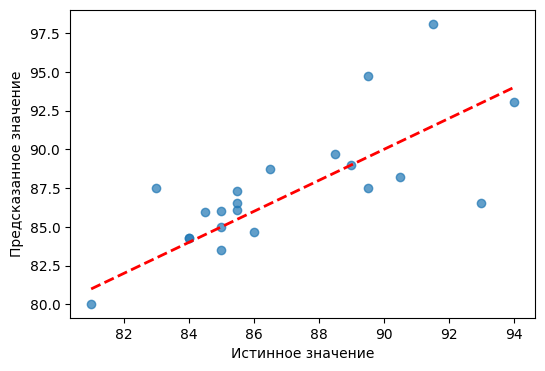

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('possum.csv')

numeric_features = ['hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly', 'age']

df_processed = df.copy()

for col in numeric_features:
    df_processed[col].fillna(df_processed[col].median(), inplace=True)
df_processed['totlngth'].fillna(df_processed['totlngth'].median(), inplace=True)

df_processed = pd.get_dummies(df_processed, columns=['sex', 'Pop'], drop_first=True)

X = df_processed.drop(columns=['case', 'totlngth', 'site'])
y = df_processed['totlngth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_baseline = LinearRegression()
lr_baseline.fit(X_train, y_train)

y_pred_baseline = lr_baseline.predict(X_test)

mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

print(f"RMSE: {rmse_baseline:.4f}")
print(f"MAE: {mae_baseline:.4f}")
print(f"R²: {r2_baseline:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_baseline, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Истинное значение')
plt.ylabel('Предсказанное значение')
plt.show()

##Улучшение бейзлайна

Были использована Ridge-регрессия

Лучший параметр alpha: 10
RMSE: 2.2752
MAE: 1.7473
R²: 0.6055


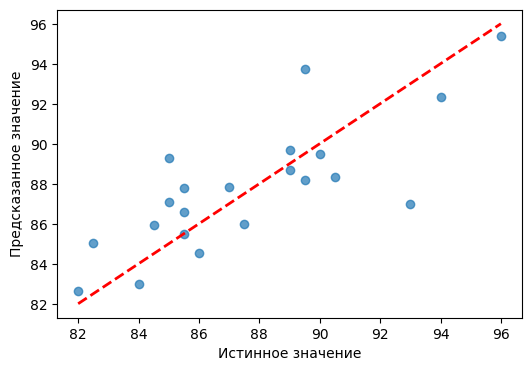

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv('possum.csv')
df = df.dropna().reset_index(drop=True)

X = df.drop(columns=['totlngth', 'case'])
y = df['totlngth']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

num_features = ['age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']
cat_features = ['site', 'Pop', 'sex']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
    ]
)

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

param_grid = {'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(
    lr_pipeline,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Лучший параметр alpha: {grid_search.best_params_['regressor__alpha']}")

mse_baseline_ridge = mean_squared_error(y_test, y_pred)
rmse_baseline_ridge = np.sqrt(mse_baseline_ridge)
mae_baseline_ridge = mean_absolute_error(y_test, y_pred)
r2_baseline_ridge = r2_score(y_test, y_pred)

print(f"RMSE: {rmse_baseline_ridge:.4f}")
print(f"MAE: {mae_baseline_ridge:.4f}")
print(f"R²: {r2_baseline_ridge:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Истинное значение')
plt.ylabel('Предсказанное значение')
plt.show()

Ridge-регрессия с предобработкой данных и подбором гиперпараметров показали значительно более лучший результат

##Имплементация алгоритма линейной регрессии

LinearRegression

RMSE: 10.2230
MAE: 9.6313
R²: -6.4350


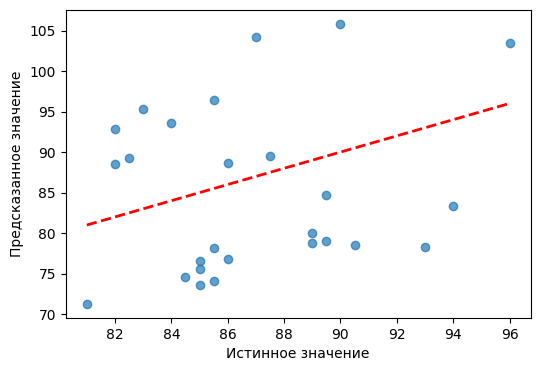

In [ ]:
df = pd.read_csv('possum.csv')

df_clean = df.dropna().reset_index(drop=True)

X = df_clean.drop(columns=['totlngth', 'case'])
y = df_clean['totlngth']

num_features = ['age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']
cat_features = ['site', 'Pop', 'sex']

X_processed_baseline = pd.get_dummies(X, columns=cat_features, drop_first=True)

X_train_base, X_test_base, y_train, y_test = train_test_split(
    X_processed_baseline, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train_scaled_base = scaler.fit_transform(X_train_base)
X_test_scaled_base = scaler.transform(X_test_base)

class CustomLinearRegression:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])
        theta = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
        self.intercept = theta[0]
        self.coefficients = theta[1:]

    def predict(self, X):
        return X @ self.coefficients + self.intercept

custom_lr_baseline = CustomLinearRegression()
custom_lr_baseline.fit(X_train_scaled_base, y_train)

y_pred_custom_baseline = custom_lr_baseline.predict(X_test_scaled_base)

mse_custom_baseline = mean_squared_error(y_test, y_pred_custom_baseline)
rmse_custom_baseline = np.sqrt(mse_custom_baseline)
mae_custom_baseline = mean_absolute_error(y_test, y_pred_custom_baseline)
r2_custom_baseline = r2_score(y_test, y_pred_custom_baseline)

print(f"RMSE: {rmse_custom_baseline:.4f}")
print(f"MAE: {mae_custom_baseline:.4f}")
print(f"R²: {r2_custom_baseline:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_custom_baseline, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Истинное значение')
plt.ylabel('Предсказанное значение')
plt.show()


Ridge-regression

RMSE: 2.3412
MAE: 1.7208
R²: 0.5927


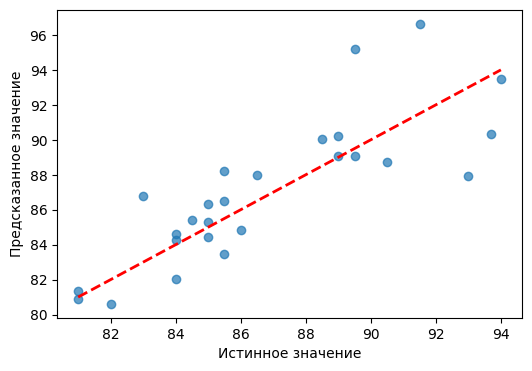

In [ ]:
df = pd.read_csv('possum.csv')

numeric_features = ['age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']
for col in numeric_features:
    df[col] = df[col].fillna(df[col].median())

X = df.drop(columns=['totlngth', 'case'])
y = df['totlngth']

num_features = ['age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']
cat_features = ['site', 'Pop', 'sex']

class CustomRidgeRegression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])
        reg_matrix = self.alpha * np.eye(X_with_intercept.shape[1])
        reg_matrix[0, 0] = 0
        theta = np.linalg.inv(X_with_intercept.T @ X_with_intercept + reg_matrix) @ X_with_intercept.T @ y
        self.intercept = theta[0]
        self.coefficients = theta[1:]

    def predict(self, X):
        X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])
        return X_with_intercept @ np.concatenate([[self.intercept], self.coefficients])


X_processed = pd.get_dummies(X, columns=cat_features, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

custom_ridge = CustomRidgeRegression(alpha=1.0)
custom_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = custom_ridge.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"RMSE: {rmse_ridge:.4f}")
print(f"MAE: {mae_ridge:.4f}")
print(f"R²: {r2_ridge:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_ridge, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Истинное значение')
plt.ylabel('Предсказанное значение')
plt.show()

На данном датасете плохо идет обычная линейная регрессия, зато rigde c l2-регуляризацией лучше работает с малым объемом данных

| Модель                              | R²      | MAE     | RMSE    |
|------------------------------------|---------|---------|---------|
| Бейзлайн (LinearRegression)        | 0.2978  | 1.9939  | 2.7879  |
| Улучшенный бейзлайн (Ridge)        | 0.6580  | 1.7189  | 2.1926  |
| Имплементация бейзлайн (LinearRegression) | -6.4350 | 9.6313  | 10.2230 |
| Улучшенная имплементация (Ridge)   | 0.5927  | 1.7208  | 2.3412  |